<a href="https://colab.research.google.com/github/rpvsaravanan/WorldBay/blob/main/query_all_payments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
# Query_All_Payments.csv
url='https://docs.google.com/spreadsheets/d/1wXzGmw0akSFmRyTFnQcKPrjs_CYhbyRt/edit?usp=sharing&ouid=108300602557327247067&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]


In [ ]:
data = pd.read_excel(url)

In [ ]:
data.head()

Unnamed: 0         Customer ID           Payment Date        Customer Name  \
0           1  143719000053619639  05 Aug, 2022 00:00:00        yinka adeniji   
1           2  143719000049224632  05 Aug, 2022 00:00:00   folashade Campbell   
2           3  143719000054577611  05 Aug, 2022 00:00:00          Janet Peter   
3           4  143719000048818544  05 Aug, 2022 00:00:00  Aekunle qudus QUDUS   
4           5  143719000040472200  05 Aug, 2022 00:00:00          alaba lawal   

  Phone Mobile Phone                 Email Billing Street Billing City  \
0   NaN  07034433565  no-reply@grocedy.com    18 olushola       dopemu   
1   NaN  08055302989   noreply@grocedy.com    112 okesuna     obalende   
2   NaN  07066613206  no-reply@grocedy.com     Ajayi farm        Ikeja   
3   NaN  07084609265   noreply@grocedy.com         Adeaye       Dupemu   
4   NaN  08121955791   noreply@grocedy.com    52 sulurele       dopemu   

                           Branch  \
0        Branch 1 - Dopemu Centre   
1  Branch 7 - Lagos Island Centre   
2        Branch 1 - Dopemu Centre   
3        Branch 1 - Dopemu Centre   
4        Branch 1 - Dopemu Centre   

                                                Unit         Basket Channel  \
0                      Unit 1 - Dopemu/Egbeda/Agege/  Silver Basket    USSD   
1  Unit 34 – Obalende/Sura/Lagos Island/Agarawu/B...    Gold Basket    USSD   
2  Unit 2 - Maryland/Ikeja/Allen/Anthony/Opebi/Mende  Silver Basket    USSD   
3                      Unit 1 - Dopemu/Egbeda/Agege/  Silver Basket    USSD   
4                      Unit 1 - Dopemu/Egbeda/Agege/  Silver Basket    USSD   

   Amount Paid      Sales Person  
0       1000.0    Peace Creasent  
1       3000.0  Olamide Akinsola  
2       1000.0     Chisom Agatha  
3       2000.0     Chisom Agatha  
4        500.0    Peace Creasent

In [ ]:
data.drop(columns= "Unnamed: 0", inplace = True)

In [ ]:
data.shape

(142879, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142879 entries, 0 to 142878
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Customer ID     142879 non-null  int64  
 1   Payment Date    142879 non-null  object 
 2   Customer Name   142879 non-null  object 
 3   Phone           9494 non-null    object 
 4   Mobile Phone    141342 non-null  object 
 5   Email           142379 non-null  object 
 6   Billing Street  142358 non-null  object 
 7   Billing City    141352 non-null  object 
 8   Branch          140731 non-null  object 
 9   Unit            139727 non-null  object 
 10  Basket          142775 non-null  object 
 11  Channel         142879 non-null  object 
 12  Amount Paid     142879 non-null  float64
 13  Sales Person    134978 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 15.3+ MB


In [ ]:
#check for null values
data.isnull().any()

Customer ID       False
Payment Date      False
Customer Name     False
Phone              True
Mobile Phone       True
Email              True
Billing Street     True
Billing City       True
Branch             True
Unit               True
Basket             True
Channel           False
Amount Paid       False
Sales Person       True
dtype: bool

In [ ]:
data.isnull().sum()

Customer ID            0
Payment Date           0
Customer Name          0
Phone             133385
Mobile Phone        1537
Email                500
Billing Street       521
Billing City        1527
Branch              2148
Unit                3152
Basket               104
Channel                0
Amount Paid            0
Sales Person        7901
dtype: int64

In [ ]:
data['Amount Paid'].mean()

13380.455458814802

In [ ]:
data["Payment Date"] = pd.to_datetime(data["Payment Date"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142879 entries, 0 to 142878
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Customer ID     142879 non-null  int64         
 1   Payment Date    142879 non-null  datetime64[ns]
 2   Customer Name   142879 non-null  object        
 3   Phone           9494 non-null    object        
 4   Mobile Phone    141342 non-null  object        
 5   Email           142379 non-null  object        
 6   Billing Street  142358 non-null  object        
 7   Billing City    141352 non-null  object        
 8   Branch          140731 non-null  object        
 9   Unit            139727 non-null  object        
 10  Basket          142775 non-null  object        
 11  Channel         142879 non-null  object        
 12  Amount Paid     142879 non-null  float64       
 13  Sales Person    134978 non-null  object        
dtypes: datetime64[ns](1), float64(1), in

In [ ]:
#Total number of unique customers 
data[['Customer ID','Customer Name']].nunique()

Customer ID      8016
Customer Name    7997
dtype: int64

In [ ]:
px.histogram(data,'Payment Date',title='Date Payments Histogram')

we can see that 2021 has the best performance.

In [ ]:
data['Billing City']=data['Billing City'].apply(lambda x:str(x).lower())
print("Billing City:",len(data['Billing City'].unique()))

Billing City: 450


450


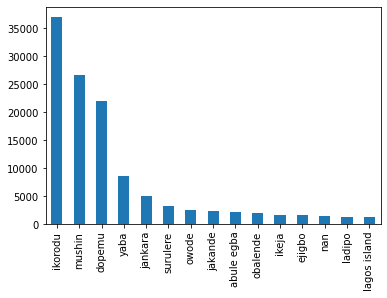

In [ ]:
# to see what areas/cities have the most customers in descending order.
# Top 15 cities
data['Billing-city-new']=data['Billing City'].str.strip()
data['Billing-city-new']=data['Billing-city-new'].str.lower()
print(data['Billing-city-new'].nunique())
data['Billing-city-new'].value_counts().sort_values(ascending=False).head(15).plot(kind = 'bar')


Basket: 245


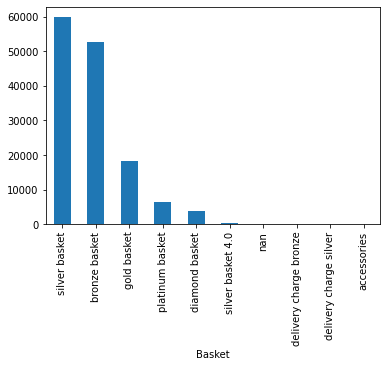

In [ ]:
# Distribution and how many basket unique values we have
data['Basket']=data['Basket'].apply(lambda x:str(x).lower())
print("Basket:",len(data['Basket'].unique()))
#top 10 baskets
data.value_counts('Basket').sort_values(ascending=False)[:10].plot.bar()

* Bronze, Silver, Gold, Platinum and Diamond Baskets are most frequent baskets.
* Rest of the baskets majorly contains just a single item.

In [ ]:
top_baskets=data.value_counts('Basket').sort_values(ascending=False)[:5].index.values
df_with_top_baskets=data[data['Basket'].isin(top_baskets)]

In [ ]:
df_with_top_baskets.head()

Customer ID Payment Date        Customer Name Phone Mobile Phone  \
0  143719000053619639   2022-08-05        yinka adeniji   NaN  07034433565   
1  143719000049224632   2022-08-05   folashade Campbell   NaN  08055302989   
2  143719000054577611   2022-08-05          Janet Peter   NaN  07066613206   
3  143719000048818544   2022-08-05  Aekunle qudus QUDUS   NaN  07084609265   
4  143719000040472200   2022-08-05          alaba lawal   NaN  08121955791   

                  Email Billing Street Billing City  \
0  no-reply@grocedy.com    18 olushola       dopemu   
1   noreply@grocedy.com    112 okesuna     obalende   
2  no-reply@grocedy.com     Ajayi farm        ikeja   
3   noreply@grocedy.com         Adeaye       dupemu   
4   noreply@grocedy.com    52 sulurele       dopemu   

                           Branch  \
0        Branch 1 - Dopemu Centre   
1  Branch 7 - Lagos Island Centre   
2        Branch 1 - Dopemu Centre   
3        Branch 1 - Dopemu Centre   
4        Branch 1 - Dopemu Centre   

                                                Unit         Basket Channel  \
0                      Unit 1 - Dopemu/Egbeda/Agege/  silver basket    USSD   
1  Unit 34 – Obalende/Sura/Lagos Island/Agarawu/B...    gold basket    USSD   
2  Unit 2 - Maryland/Ikeja/Allen/Anthony/Opebi/Mende  silver basket    USSD   
3                      Unit 1 - Dopemu/Egbeda/Agege/  silver basket    USSD   
4                      Unit 1 - Dopemu/Egbeda/Agege/  silver basket    USSD   

   Amount Paid      Sales Person Billing-city-new  
0       1000.0    Peace Creasent           dopemu  
1       3000.0  Olamide Akinsola         obalende  
2       1000.0     Chisom Agatha            ikeja  
3       2000.0     Chisom Agatha           dupemu  
4        500.0    Peace Creasent           dopemu

In [ ]:
# channel
data["Channel"].str.lower().value_counts()

cash                123172
ussd                 18214
bank transfer         1189
check                  198
debit card              80
mcash                   12
credit card              6
direct deduction         4
net off                  4
Name: Channel, dtype: int64

In [ ]:
data["Channel"].replace(['Cash','cash'],'Cash',inplace=True)
px.histogram(data,'Channel',).update_xaxes(categoryorder='total descending')

In [ ]:
# basket
# df_with_top_baskets["Basket"].str.lower().value_counts()

In [ ]:
basket = ["Silver Basket", "Gold Basket", "Platinum Basket", "Bronze Basket", "SILVER BASKET 4.0", "BRONZE 4.0", "BRONZE BASKET 3.0", "Gold Basket 2.0", "GOLD BASKET 4.0", "Platinum Basket 2.0", "Silver Basket 2.0", "SILVER BASKET 3.0", "Diamond Basket", "Diamond Basket 2.0", "DIAMOND BASKET 3.0"]

# pay_subs = df_pay[df_pay["Basket"].isin(basket)]
pay_subs = df_pay[df_pay["Basket"].isin(basket)]

NameError: ignored

* what does mcash mean?
* Discrepancies in types of baskets
Basket basket, basket 3.0, basket 4.0
* data validation for customers with high monetary value



## Customer Segregation based on Total Amt Paid & Orders Count

In [ ]:
median_amt_df=data.groupby('Customer ID')['Amount Paid'].median().to_frame().rename(columns={'Amount Paid':'Median Amt Paid'})
mean_amt_df=data.groupby('Customer ID')['Amount Paid'].mean().to_frame().rename(columns={'Amount Paid':'Mean Amt Paid'})
orders_count_df=data['Customer ID'].value_counts().to_frame().reset_index().rename(columns={'Customer ID':'Orders Count','index':'Customer ID'})

In [ ]:
customer_df=median_amt_df.merge(mean_amt_df,on='Customer ID').merge(orders_count_df,on='Customer ID')
customer_df['Median Amt Paid']=customer_df['Median Amt Paid'].map(int)
customer_df['Mean Amt Paid']=customer_df['Mean Amt Paid'].map(int)

In [ ]:
customer_df

Customer ID  Median Amt Paid  Mean Amt Paid  Orders Count
0     143719000000040059          7058190        7598046            19
1     143719000000040071           200000         200000             1
2     143719000000040083          3784225        3784225             2
3     143719000000040099          1806000        3405062            45
4     143719000000040141           150000         186000             5
...                  ...              ...            ...           ...
8011  143719000056275397             2000           2000             2
8012  143719000056307389             6000           6000             2
8013  143719000056401339             4200           4200             1
8014  143719000056401595             4200           4200             1
8015  143719000056422001              500            500             1

[8016 rows x 4 columns]

#### Remove Outliers 

In [ ]:
mean_quartile=customer_df["Median Amt Paid"].quantile(0.9)
median_quartile=customer_df["Mean Amt Paid"].quantile(0.9)
customer_wo_outliers_df=customer_df[(customer_df['Median Amt Paid']<median_quartile) & (customer_df['Mean Amt Paid']<mean_quartile)]

In [ ]:
px.scatter(customer_wo_outliers_df,'Mean Amt Paid','Median Amt Paid')

* We can use mean/median amount paid and total orders of individual customers as factors while estimating credit score.
* Higher the mean amount, greater should be the credit amount.
* Higher the orders count, greater the trust in our customer.